## 공백 기반 토큰화

`"그녀는 나와 밥을 먹는다"` 라는 문장이 주어지면 공백 기준으로 나눈다고 가정해보자 

1.    `1: 그녀는` `2: 나와` `3: 밥을` `4: 먹는다` 4개 단어
2.   `1: 그녀` `2: 는` `3: 나` `4: 와` `5: 밥` `6: 을` `7: 먹는다` 잘개 쪼개어 7개 단어

그것은 우리가 정의할 **토큰화 기법이 결정할 부분**! 

문장을 어떤 기준으로 쪼개었을 때, 쪼개진 각 단어들을 **토큰(Token)** 이라고 부릅니다. 그리고 그 쪼개진 기준이 **토큰화(Tokenization) 기법**에 의해 정해지죠. 이번 스텝에서는 토큰화의 여러 가지 기법에 대해 배워보도록 하겠습니다.

 자연어의 노이즈를 제거하는 방법 중 하나로 우리는 `Hi,` 를 `Hi`와  `,`로 나누기 위해 문장부호 양옆에 공백을 추가해 주었습니다. 그것은 이 **공백 기반 토큰화**를 사용하기 위해서였죠! 당시의 예제 코드를 다시 가져와 공백을 기반으로 토큰화를 진행해 보겠습니다.

In [ ]:
corpus = \
"""
in the days that followed i learned to spell in this uncomprehending way a great many words ,  among them pin ,  hat ,  cup and a few verbs like sit ,  stand and walk .  
but my teacher had been with me several weeks before i understood that everything has a name . 
one day ,  we walked down the path to the well house ,  attracted by the fragrance of the honeysuckle with which it was covered .  
some one was drawing water and my teacher placed my hand under the spout .  
as the cool stream gushed over one hand she spelled into the other the word water ,  first slowly ,  then rapidly .  
i stood still ,  my whole attention fixed upon the motions of her fingers .  
suddenly i felt a misty consciousness as of something forgotten a thrill of returning thought  and somehow the mystery of language was revealed to me .  
i knew then that  w a t e r  meant the wonderful cool something that was flowing over my hand .  
that living word awakened my soul ,  gave it light ,  hope ,  joy ,  set it free !  
there were barriers still ,  it is true ,  but barriers that could in time be swept away . 
"""

# HINT : split()을 사용하여 공백토큰화를 수행하세요.
tokens = corpus.split()

print("문장이 포함하는 Tokens:", tokens)

문장이 포함하는 Tokens: ['in', 'the', 'days', 'that', 'followed', 'i', 'learned', 'to', 'spell', 'in', 'this', 'uncomprehending', 'way', 'a', 'great', 'many', 'words', ',', 'among', 'them', 'pin', ',', 'hat', ',', 'cup', 'and', 'a', 'few', 'verbs', 'like', 'sit', ',', 'stand', 'and', 'walk', '.', 'but', 'my', 'teacher', 'had', 'been', 'with', 'me', 'several', 'weeks', 'before', 'i', 'understood', 'that', 'everything', 'has', 'a', 'name', '.', 'one', 'day', ',', 'we', 'walked', 'down', 'the', 'path', 'to', 'the', 'well', 'house', ',', 'attracted', 'by', 'the', 'fragrance', 'of', 'the', 'honeysuckle', 'with', 'which', 'it', 'was', 'covered', '.', 'some', 'one', 'was', 'drawing', 'water', 'and', 'my', 'teacher', 'placed', 'my', 'hand', 'under', 'the', 'spout', '.', 'as', 'the', 'cool', 'stream', 'gushed', 'over', 'one', 'hand', 'she', 'spelled', 'into', 'the', 'other', 'the', 'word', 'water', ',', 'first', 'slowly', ',', 'then', 'rapidly', '.', 'i', 'stood', 'still', ',', 'my', 'whole', 'attenti

## 형태소 기반 토큰화

하지만 우리에겐 영어 문장이 아닌 한국어 문장을 처리할 일이 더 많을 것이고, 한국어 문장은 **공백 기준**으로 토큰화를 했다간 **엉망진창의 단어들이 등장하는 것**을 알 수 있습니다. 문장부호처럼 **"은 / 는 / 이 / 가"**  양옆에 공백을 붙이자구요? 글쎄요... 가로 시작하는 단어만 해도 가면, 가위, 가족, 가수... 의도치 않은 변형이 너무나도 많이 일어날 것 같네요!

이를 어떻게 해결할 수 있을까요? 정답은 **형태소**에 있습니다. 어릴 적 국어 시간에 배운 기억이 새록새록 나시나요? 상기시켜드리면 형태소의 정의는 아래와 같습니다.

*(명사)  뜻을 가진 가장 작은 말의 단위.*

예를 들어, `오늘도 공부만 한다`  라는 문장이 있다면, `오늘`, `도`, `공부`, `만`, `한다` 로 쪼개지는 것이 바로 형태소죠. 한국어는 이를 활용해 토큰화를 할 수 있습니다!

한국어 형태소 분석기는 대표적으로 아래 두 가지가 사용됩니다.
- KoNLPy 파이썬 한국어 패키지
- kakao/khaiii

KoNLPy는 내부적으로 5가지의 형태소 분석 Class를 포함하고 있습니다. Khaiii까지 총 6개나 되는 형태소 분석기들은 **특수한 문장(띄어쓰기 X / 오탈자) 처리 성능, 속도** 측면에서 **차이**를 보입니다. 천하무적인 것은 (아직은) 없으니, 각 분석기를 직접 테스트해보고 적합한 것을 선택해 사용하면 됩니다.

### Colab에서 mecab설치하기

```
local에서 mecab 설치
$ pip install konlpy
$ pip install eunjeon
- from eunjeon import Mecab
- mecab = Mecab()
```

In [ ]:
!pip install konlpy
!git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git 
%cd Mecab-ko-for-Google-Colab/
!bash install_mecab-ko_on_colab190912.sh
%cd ../

     |████████████████████████████████| 19.4 MB 33.8 MB/s 
     |████████████████████████████████| 448 kB 38.1 MB/s 
Cloning into 'Mecab-ko-for-Google-Colab'...
remote: Enumerating objects: 109, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 109 (delta 7), reused 10 (delta 3), pack-reused 91
Receiving objects: 100% (109/109), 1.27 MiB | 7.88 MiB/s, done.
Resolving deltas: 100% (46/46), done.
/content/Mecab-ko-for-Google-Colab
Installing konlpy.....
Done
Installing mecab-0.996-ko-0.9.2.tar.gz.....
from https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
--2022-03-16 08:29:19--  https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
Resolving bitbucket.org (bitbucket.org)... 104.192.141.1, 2406:da00:ff00::6b17:d1f5, 2406:da00:ff00::22cd:e0db, ...
Connecting to bitbucket.org (bitbucket.org)|104.192.141.1|:443... connected.
HTTP request sent, awaiting response... 302 Found
Loc

In [ ]:
from konlpy.tag import Mecab
mecab = Mecab()

In [ ]:
# None자리에 문장을 넣어보고 토큰화 결과를 출력해보세요.

# 예시문장 : 자연어처리가너무재밌어서밥먹는것도가끔까먹어요
print(mecab.morphs('자연어처리가너무재밌어서밥먹는것도가끔까먹어요'))

['자연어', '처리', '가', '너무', '재밌', '어서', '밥', '먹', '는', '것', '도', '가끔', '까먹', '어요']


In [ ]:
okt = Okt()
sentence = '자연어처리가너무재밌어서밥먹는것도가끔까먹어요'
okt.morphs(sentence)

NameError: ignored

In [ ]:
Hannanum = Hannanum()
sentence = '자연어처리가너무재밌어서밥먹는것도가끔까먹어요'
Hannanum.morphs(sentence)

In [ ]:
from konlpy.tag import Hannanum,Kkma,Komoran,Mecab,Okt
tokenizer_list = [Hannanum(),Kkma(),Komoran(),Mecab(),Okt()]

kor_text = '코로나바이러스는 2019년 12월 중국 우한에서 처음 발생한 뒤 전 세계로 확산된, 새로운 유형의 호흡기 감염 질환입니다.'

for tokenizer in tokenizer_list:
    print('[{}] \n{}'.format(tokenizer.__class__.__name__, tokenizer.pos(kor_text)))

[Hannanum] 
[('코로나바이러스', 'N'), ('는', 'J'), ('2019년', 'N'), ('12월', 'N'), ('중국', 'N'), ('우한', 'N'), ('에서', 'J'), ('처음', 'M'), ('발생', 'N'), ('하', 'X'), ('ㄴ', 'E'), ('뒤', 'N'), ('전', 'N'), ('세계', 'N'), ('로', 'J'), ('확산', 'N'), ('되', 'X'), ('ㄴ', 'E'), (',', 'S'), ('새롭', 'P'), ('은', 'E'), ('유형', 'N'), ('의', 'J'), ('호흡기', 'N'), ('감염', 'N'), ('질환', 'N'), ('이', 'J'), ('ㅂ니다', 'E'), ('.', 'S')]
[Kkma] 
[('코로나', 'NNG'), ('바', 'NNG'), ('이러', 'MAG'), ('슬', 'VV'), ('는', 'ETD'), ('2019', 'NR'), ('년', 'NNM'), ('12', 'NR'), ('월', 'NNM'), ('중국', 'NNG'), ('우', 'NNG'), ('하', 'XSV'), ('ㄴ', 'ETD'), ('에', 'VV'), ('서', 'ECD'), ('처음', 'NNG'), ('발생', 'NNG'), ('하', 'XSV'), ('ㄴ', 'ETD'), ('뒤', 'NNG'), ('전', 'NNG'), ('세계', 'NNG'), ('로', 'JKM'), ('확산', 'NNG'), ('되', 'XSV'), ('ㄴ', 'ETD'), (',', 'SP'), ('새', 'NNG'), ('롭', 'XSA'), ('ㄴ', 'ETD'), ('유형', 'NNG'), ('의', 'JKG'), ('호흡기', 'NNG'), ('감염', 'NNG'), ('질환', 'NNG'), ('이', 'VCP'), ('ㅂ니다', 'EFN'), ('.', 'SF')]
[Komoran] 
[('코로나바이러스', 'NNP'), ('는', 'JX'), ('2019', 'SN'

## 인코딩

### 단어 기반 인코딩

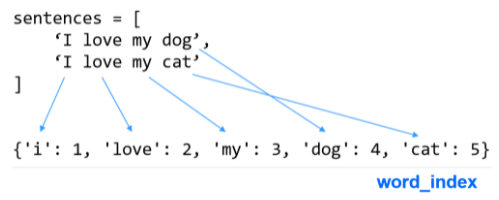

- Tokenizer(num_words = 100) : num_words를 단어 빈도수가 높은 순으로 100개만 사용한다는 의미이다. 나머지는 고려하지 않는다.
- fit_on_texts : 문자 데이터를 입력받아서 리스트의 형태로 변환
- word_index : tokenizer의 word_index 속성은 단어와 숫자의 키-값 쌍을 포함하는 딕셔너리를 반환한다. 이때, 반환 시 자동으로 소문자로 변환되어 들어간다. 그리고 느낌표나 마침표 같은 구두점은 자동으로 제거된다.

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer

sentences = [
  'I love my dog',
  'I love my cat',
]

tokenizer = Tokenizer(num_words = 100) 
tokenizer.fit_on_texts(sentences) # 문자 데이터를 입력받아서 리스트의 형태로 변환
word_index = tokenizer.word_index # 토큰별 단어에 index를 매핑시켜준다.
print(word_index)

### 텍스트를 시퀀스로 변환하기

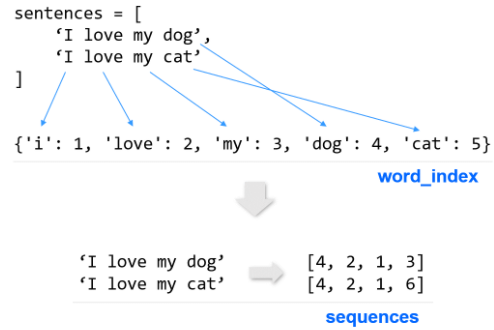

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer

sentences = [
  'I love my dog',
  'I love my cat',
  'You love my dog!',
  'Do you think my dog is amazing?'
]

tokenizer = Tokenizer(num_words = 100)
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index

sequences = tokenizer.texts_to_sequences(sentences) # 텍스트를 시퀀스로 변환

print(word_index)
print(sequences)

{'my': 1, 'love': 2, 'dog': 3, 'i': 4, 'you': 5, 'cat': 6, 'do': 7, 'think': 8, 'is': 9, 'amazing': 10}
[[4, 2, 1, 3], [4, 2, 1, 6], [5, 2, 1, 3], [7, 5, 8, 1, 3, 9, 10]]


### 패딩설정하기

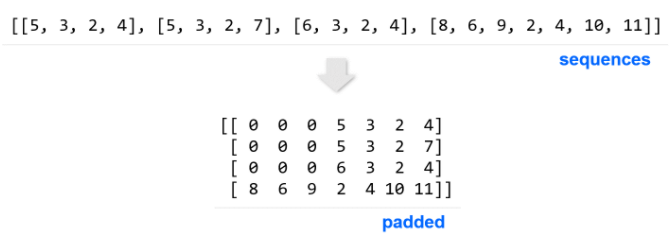

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

sentences = [
  'I love my dog',
  'I love my cat',
  'You love my dog!',
  'Do you think my dog is amazing?'
]

tokenizer = Tokenizer(num_words = 100, oov_token="<OOV>")
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(sentences)

padded = pad_sequences(sequences)

print(word_index)
print(sequences)
print(padded)

{'<OOV>': 1, 'my': 2, 'love': 3, 'dog': 4, 'i': 5, 'you': 6, 'cat': 7, 'do': 8, 'think': 9, 'is': 10, 'amazing': 11}
[[5, 3, 2, 4], [5, 3, 2, 7], [6, 3, 2, 4], [8, 6, 9, 2, 4, 10, 11]]
[[ 0  0  0  5  3  2  4]
 [ 0  0  0  5  3  2  7]
 [ 0  0  0  6  3  2  4]
 [ 8  6  9  2  4 10 11]]


# 한국어-영어 코퍼스 (실제 데이터)로 토큰화 수행하기

In [ ]:
import os
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

%matplotlib inline

In [ ]:
!wget https://github.com/jungyeul/korean-parallel-corpora/raw/master/korean-english-news-v1/korean-english-park.train.tar.gz

--2022-03-16 08:35:50--  https://github.com/jungyeul/korean-parallel-corpora/raw/master/korean-english-news-v1/korean-english-park.train.tar.gz
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/jungyeul/korean-parallel-corpora/master/korean-english-news-v1/korean-english-park.train.tar.gz [following]
--2022-03-16 08:35:50--  https://raw.githubusercontent.com/jungyeul/korean-parallel-corpora/master/korean-english-news-v1/korean-english-park.train.tar.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8718893 (8.3M) [application/octet-stream]
Saving to: ‘korean-english-park.train.tar.gz’

korean-eng

In [ ]:
!tar -xzvf korean-english-park.train.tar.gz

korean-english-park.train.en
korean-english-park.train.ko


In [ ]:
path_to_file = './korean-english-park.train.ko'
# local인 경우, os.getenv('home')

with open(path_to_file, "r") as f:
    raw = f.read().splitlines()

print("Data Size :", len(raw))

Data Size : 94123


In [ ]:
print("Examples :")
for sen in raw[0:100][::20]: print(">>", sen)

Examples :
>> 개인용 컴퓨터 사용의 상당 부분은 "이것보다 뛰어날 수 있느냐?"
>> 북한의 핵무기 계획을 포기하도록 하려는 압력이 거세지고 있는 가운데, 일본과 북한의 외교관들이 외교 관계를 정상화하려는 회담을 재개했다.
>> "경호 로보트가 침입자나 화재를 탐지하기 위해서 개인적으로, 그리고 전문적으로 사용되고 있습니다."
>> 수자원부 당국은 논란이 되고 있고, 막대한 비용이 드는 이 사업에 대해 내년에 건설을 시작할 계획이다.
>> 또한 근력 운동은 활발하게 걷는 것이나 최소한 20분 동안 뛰는 것과 같은 유산소 활동에서 얻는 운동 효과를 심장과 폐에 주지 않기 때문에, 연구학자들은 근력 운동이 심장에 큰 영향을 미치는지 여부에 대해 논쟁을 해왔다.


In [ ]:
min_len = 999
max_len = 0
sum_len = 0

for sen in raw:
    length = len(sen)
    if min_len > length: min_len = length
    if max_len < length: max_len = length
    sum_len += length

print('문장의 최단 길이 :',min_len)
print('문장의 최장 길이 :',max_len)
print('문장의 평균 길이 :', sum_len//len(raw))

문장의 최단 길이 : 1
문장의 최장 길이 : 377
문장의 평균 길이 : 60


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


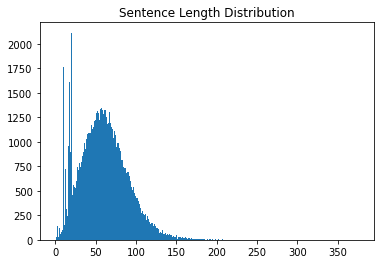

In [ ]:
sentence_length = np.zeros((max_len), dtype=np.int)
for sen in raw:
    sentence_length[len(sen)-1] += 1

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title('Sentence Length Distribution')
plt.show()

In [ ]:
def check_sentence_with_length(raw, length):
    count = 0

    for sen in raw:
        if len(sen) == length:
            print(sen)
            count += 1
            if count > 100: return

In [ ]:
check_sentence_with_length(raw, 1)

’


In [ ]:
for idx, _sum in enumerate(sentence_length):
    #문장의 수가 1500을 초과하는 문장 길이를 추출합니다.
    if _sum > 1500:
        print('Outlier Index :', idx+1)

Outlier Index : 11
Outlier Index : 19
Outlier Index : 21


In [ ]:
check_sentence_with_length(raw, 11)

라고 조던이 말했다.
- 모르고 있습니다.
- 네, 보이는군요.
디즈니사만이 아니다.
큰 파티는 아니지요.
의자는 비어 있었다.
이 일은 계속됩니다.
나는 크게 실망했다.
그 이유는 간단하다.
이력서와 자기 소개서
시대가 변하고 있다.
는 돌발질문을 했다.
9. 몇 분간의 명상
하와이, 빅 아일랜드
키스를 잘 하는 방법
키스를 잘 하는 방법
스피어스가 뚱뚱한가?
산 위를 나는 느낌.
세 시간쯤 걸었을까?
(아직 읽고있습니까?
처음에는 장난이었다.
우리는 운이 좋았다.
아기가 숨을 멈출 때
건물 전체 무너져내려
그녀의 아름다운 눈.
대답은 다음과 같다.
"사과할 것이 없다.
폭탄테러가 공포 유발
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1

In [ ]:
min_len = 999
max_len = 0
sum_len = 0

cleaned_corpus = list(set(raw))
print("Data Size : ", len(cleaned_corpus))

for sen in cleaned_corpus:
    length = len(sen)
    if min_len > length: min_len = length
    if max_len < length: max_len = length
    sum_len += length

print("문장의 최단 길이 :", min_len)
print("문장의 최장 길이 :", max_len)
print("문장의 평균 길이 :", sum_len//len(cleaned_corpus))

Data Size :  77591
문장의 최단 길이 : 1
문장의 최장 길이 : 377
문장의 평균 길이 : 64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


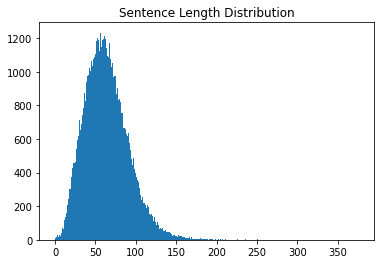

In [ ]:
sentence_length = np.zeros((max_len), dtype=np.int)

for sen in cleaned_corpus:
    sentence_length[len(sen)-1] += 1

plt.bar(range(max_len), sentence_length, width= 1.0)
plt.title("Sentence Length Distribution")
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


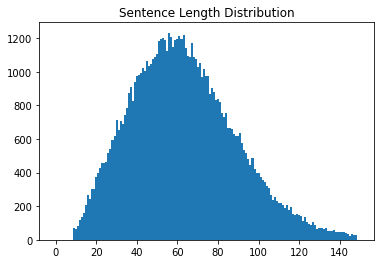

In [ ]:
max_len = 150
min_len = 10

filtered_corpus = [s for s in cleaned_corpus if (len(s) < max_len) & (len(s) >= min_len)]

sentence_length = np.zeros((max_len), dtype=np.int)

for sen in filtered_corpus:
    sentence_length[len(sen)-1] += 1

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution")
plt.show()

## 공백 기반 토큰화

In [ ]:
# Quiz : 정제된 데이터를 공백 기반으로 토큰화하여 list에 저장한 후, tokenize()함수를 사용해 단어 사전과 Tensor데이터를 얻으세요!

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

corpus = \
"""
in the days that followed i learned to spell in this uncomprehending way a great many words ,  among them pin ,  hat ,  cup and a few verbs like sit ,  stand and walk .  
but my teacher had been with me several weeks before i understood that everything has a name . 
one day ,  we walked down the path to the well house ,  attracted by the fragrance of the honeysuckle with which it was covered .  
some one was drawing water and my teacher placed my hand under the spout .  
as the cool stream gushed over one hand she spelled into the other the word water ,  first slowly ,  then rapidly .  
i stood still ,  my whole attention fixed upon the motions of her fingers .  
suddenly i felt a misty consciousness as of something forgotten a thrill of returning thought  and somehow the mystery of language was revealed to me .  
i knew then that  w a t e r  meant the wonderful cool something that was flowing over my hand .  
that living word awakened my soul ,  gave it light ,  hope ,  joy ,  set it free !  
there were barriers still ,  it is true ,  but barriers that could in time be swept away . 
"""

def tokenize(corpus):
    tokenizer = Tokenizer(filters = '',num_words = 100)
    tokenizer.fit_on_texts(corpus)
    print(tokenizer)

    sequences = tokenizer.texts_to_sequences(corpus)  
    tensor = pad_sequences(sequences, padding = 'post')
   

    return tensor, tokenizer

In [ ]:
# 정제된 데이터를 공백 기반으로 토큰화하여 저장하는 코드를 직접 작성해보세요.
corpus = \
"""
in the days that followed i learned to spell in this uncomprehending way a great many words ,  among them pin ,  hat ,  cup and a few verbs like sit ,  stand and walk .  
but my teacher had been with me several weeks before i understood that everything has a name . 
one day ,  we walked down the path to the well house ,  attracted by the fragrance of the honeysuckle with which it was covered .  
some one was drawing water and my teacher placed my hand under the spout .  
as the cool stream gushed over one hand she spelled into the other the word water ,  first slowly ,  then rapidly .  
i stood still ,  my whole attention fixed upon the motions of her fingers .  
suddenly i felt a misty consciousness as of something forgotten a thrill of returning thought  and somehow the mystery of language was revealed to me .  
i knew then that  w a t e r  meant the wonderful cool something that was flowing over my hand .  
that living word awakened my soul ,  gave it light ,  hope ,  joy ,  set it free !  
there were barriers still ,  it is true ,  but barriers that could in time be swept away . 
"""
split_corpus = []
filter_corpus = corpus.split('.')
for kor in filter_corpus:
  split_corpus.append(kor.split())
print(split_corpus)

[['in', 'the', 'days', 'that', 'followed', 'i', 'learned', 'to', 'spell', 'in', 'this', 'uncomprehending', 'way', 'a', 'great', 'many', 'words', ',', 'among', 'them', 'pin', ',', 'hat', ',', 'cup', 'and', 'a', 'few', 'verbs', 'like', 'sit', ',', 'stand', 'and', 'walk'], ['but', 'my', 'teacher', 'had', 'been', 'with', 'me', 'several', 'weeks', 'before', 'i', 'understood', 'that', 'everything', 'has', 'a', 'name'], ['one', 'day', ',', 'we', 'walked', 'down', 'the', 'path', 'to', 'the', 'well', 'house', ',', 'attracted', 'by', 'the', 'fragrance', 'of', 'the', 'honeysuckle', 'with', 'which', 'it', 'was', 'covered'], ['some', 'one', 'was', 'drawing', 'water', 'and', 'my', 'teacher', 'placed', 'my', 'hand', 'under', 'the', 'spout'], ['as', 'the', 'cool', 'stream', 'gushed', 'over', 'one', 'hand', 'she', 'spelled', 'into', 'the', 'other', 'the', 'word', 'water', ',', 'first', 'slowly', ',', 'then', 'rapidly'], ['i', 'stood', 'still', ',', 'my', 'whole', 'attention', 'fixed', 'upon', 'the', 'm

In [ ]:
split_tensor, split_tokenizer = tokenize(split_corpus)
print(split_tokenizer)
print("Split Vocab Size :", len(split_tokenizer.index_word))
print(split_tokenizer.index_word)

Split Vocab Size : 131
{1: ',', 2: 'the', 3: 'that', 4: 'a', 5: 'my', 6: 'i', 7: 'of', 8: 'and', 9: 'it', 10: 'was', 11: 'in', 12: 'to', 13: 'one', 14: 'hand', 15: 'but', 16: 'teacher', 17: 'with', 18: 'me', 19: 'water', 20: 'as', 21: 'cool', 22: 'over', 23: 'word', 24: 'then', 25: 'still', 26: 'something', 27: 'barriers', 28: 'days', 29: 'followed', 30: 'learned', 31: 'spell', 32: 'this', 33: 'uncomprehending', 34: 'way', 35: 'great', 36: 'many', 37: 'words', 38: 'among', 39: 'them', 40: 'pin', 41: 'hat', 42: 'cup', 43: 'few', 44: 'verbs', 45: 'like', 46: 'sit', 47: 'stand', 48: 'walk', 49: 'had', 50: 'been', 51: 'several', 52: 'weeks', 53: 'before', 54: 'understood', 55: 'everything', 56: 'has', 57: 'name', 58: 'day', 59: 'we', 60: 'walked', 61: 'down', 62: 'path', 63: 'well', 64: 'house', 65: 'attracted', 66: 'by', 67: 'fragrance', 68: 'honeysuckle', 69: 'which', 70: 'covered', 71: 'some', 72: 'drawing', 73: 'placed', 74: 'under', 75: 'spout', 76: 'stream', 77: 'gushed', 78: 'she', 

In [ ]:
for idx, word in enumerate(split_tokenizer.word_index):
  print(idx,':',word)


0 : ,
1 : the
2 : that
3 : a
4 : my
5 : i
6 : of
7 : and
8 : it
9 : was
10 : in
11 : to
12 : one
13 : hand
14 : but
15 : teacher
16 : with
17 : me
18 : water
19 : as
20 : cool
21 : over
22 : word
23 : then
24 : still
25 : something
26 : barriers
27 : days
28 : followed
29 : learned
30 : spell
31 : this
32 : uncomprehending
33 : way
34 : great
35 : many
36 : words
37 : among
38 : them
39 : pin
40 : hat
41 : cup
42 : few
43 : verbs
44 : like
45 : sit
46 : stand
47 : walk
48 : had
49 : been
50 : several
51 : weeks
52 : before
53 : understood
54 : everything
55 : has
56 : name
57 : day
58 : we
59 : walked
60 : down
61 : path
62 : well
63 : house
64 : attracted
65 : by
66 : fragrance
67 : honeysuckle
68 : which
69 : covered
70 : some
71 : drawing
72 : placed
73 : under
74 : spout
75 : stream
76 : gushed
77 : she
78 : spelled
79 : into
80 : other
81 : first
82 : slowly
83 : rapidly
84 : stood
85 : whole
86 : attention
87 : fixed
88 : upon
89 : motions
90 : her
91 : fingers
92 : suddenly
93 :

In [ ]:
path_to_file = './korean-english-park.train.ko'
# local인 경우, os.getenv('home')

with open(path_to_file, "r") as f:
    corpus = f.read().splitlines()

print("Data Size :", len(corpus))

Data Size : 94123


In [ ]:
corpus[:5]

['개인용 컴퓨터 사용의 상당 부분은 "이것보다 뛰어날 수 있느냐?"',
 '모든 광마우스와 마찬가지 로 이 광마우스도 책상 위에 놓는 마우스 패드를 필요로 하지 않는다.',
 '그러나 이것은 또한 책상도 필요로 하지 않는다.',
 '79.95달러하는 이 최첨단 무선 광마우스는 허공에서 팔목, 팔, 그외에 어떤 부분이든 그 움직임에따라 커서의 움직임을 조절하는 회전 운동 센서를 사용하고 있다.',
 '정보 관리들은 동남 아시아에서의 선박들에 대한 많은 (테러) 계획들이 실패로 돌아갔음을 밝혔으며, 세계 해상 교역량의 거의 3분의 1을 운송하는 좁은 해로인 말라카 해협이 테러 공격을 당하기 쉽다고 경고하고 있다.']

## 형태소 토큰화

In [ ]:
# 위에서 사용한 코드를 활용해 Mecab 단어 사전을 만들기
# hint : mecap.morphs() -> 형태소 분석 수행

def mecap_split(sentence):
  # 코드 작성
  mecab = Mecab()
  return mecab.morphs(sentence)



In [ ]:
mecab_corpus = []
for kor in corpus:
  mecab_corpus.append(mecap_split(kor))

In [ ]:
mecab_tensor, mecab_tokenizer = tokenize(mecab_corpus)
print('Mecab Vocab Size:',len(mecab_tokenizer.index_word))

Mecab Vocab Size: 52906


In [ ]:
print(mecab_tokenizer.index_word)

{1: '.', 2: '다', 3: '이', 4: '는', 5: '을', 6: '의', 7: '에', 8: '은', 9: '하', 10: '를', 11: '했', 12: '고', 13: '가', 14: '있', 15: '들', 16: ',', 17: '에서', 18: '한', 19: '것', 20: '으로', 21: '로', 22: '“', 23: '”', 24: ')', 25: '다고', 26: '(', 27: '인', 28: '과', 29: '일', 30: '그', 31: '와', 32: '지', 33: '말', 34: '명', 35: '적', 36: '기', 37: '할', 38: '었', 39: '라고', 40: '되', 41: '년', 42: '도', 43: '밝혔', 44: '수', 45: '며', 46: '미국', 47: '않', 48: '게', 49: '된', 50: '"', 51: '만', 52: '1', 53: '대통령', 54: '해', 55: '2', 56: '에게', 57: '시간', 58: '던', 59: '어', 60: '전', 61: '됐', 62: '받', 63: '았', 64: '\xa0', 65: '월', 66: '대한', 67: '위해', 68: '정부', 69: '중', 70: '이번', 71: '현지', 72: '3', 73: '전했', 74: '없', 75: '주', 76: '습니다', 77: '지난', 78: '지만', 79: '‘', 80: '한다', 81: '’', 82: '까지', 83: '사람', 84: '4', 85: '이라크', 86: '될', 87: '대해', 88: '아', 89: '6', 90: '더', 91: '보', 92: "'", 93: '면', 94: '경찰', 95: '지역', 96: '자', 97: '다는', 98: '자신', 99: '북한', 100: '미', 101: '중국', 102: '5', 103: '-', 104: '그러나', 105: '%', 106: '주장', 107: '같',

In [ ]:
type(mecab_tokenizer.index_word)

dict

In [ ]:
answer = []
for i in mecab_tensor:
  for j in i:
    try:
      answer.append(mecab_tokenizer.index_word[j])
    except:
      continue
answer[0]

'의'

In [ ]:
answer

['의',
 '은',
 '"',
 '수',
 '있',
 '"',
 '와',
 '로',
 '이',
 '도',
 '에',
 '는',
 '를',
 '로',
 '하',
 '지',
 '않',
 '.',
 '은',
 '도',
 '로',
 '하',
 '지',
 '않',
 '.',
 '.',
 '하',
 '는',
 '이',
 '는',
 '에서',
 ',',
 ',',
 '그',
 '에',
 '이',
 '그',
 '에',
 '의',
 '을',
 '하',
 '는',
 '를',
 '하',
 '고',
 '있',
 '다',
 '.',
 '들',
 '은',
 '에서',
 '의',
 '들',
 '에',
 '대한',
 '은',
 '(',
 ')',
 '들',
 '이',
 '로',
 '을',
 ',',
 '의',
 '3',
 '의',
 '1',
 '을',
 '하',
 '는',
 '은',
 '해',
 '로',
 '인',
 '이',
 '을',
 '기',
 '다고',
 '하',
 '고',
 '있',
 '다',
 '.',
 '이',
 '지역',
 '에',
 '있',
 '는',
 '미국',
 '과',
 '들',
 '에',
 '대한',
 '의',
 '(',
 ')',
 '중',
 '이',
 '했',
 '다는',
 '것',
 '을',
 '게',
 '된',
 '에',
 ',',
 '들',
 '은',
 '이',
 '에',
 '을',
 '하',
 '고',
 '있',
 ',',
 '에',
 '있',
 '는',
 '의',
 '가',
 '에',
 '있',
 '다고',
 '그',
 '들',
 '은',
 '하',
 '고',
 '있',
 '다',
 '.',
 '가',
 '한',
 '에',
 '면',
 ',',
 '한',
 '를',
 '하',
 '는',
 '들',
 '시간',
 '를',
 '지',
 '않',
 '고',
 '있',
 '기',
 '위해',
 '이',
 '한',
 '들',
 '에게',
 '이',
 '시간',
 '을',
 '고',
 '을',
 '는',
 '이',
 '한다',
 '.',
 '이',
 '에',
 '